# Пример работы с данными рестинга

In [6]:
from RestingEEG import RestingEEG
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
%matplotlib inline


In [2]:
folder_path = "../Data_Txt"
filename = "afl_01.TXT"

 - 1 – ГО
 - 2 – ГО в темноте
 - 3 – ГЗ в темноте




Рассматриваем переходы между состояниями «Глаза закрыты» - «Глаза открыты в темноте» - «Глаза открыты на свету». Это по данным на маленькой группе – 19 человек.
Открывание глаз в темноте (Рисунок ниже) приводит к изменениям локальной синхронизации (спектры мощности) и когерентности во всех частотных диапазонах ЭЭГ от дельта (1,5-4Гц) до низкочастотного гамма (30-40Гц). Эти изменения не могут быть связаны с поступлением в кору зрительной информации или светового потока. Мы предположили, что открывание глаз в темноте запускает механизм непроизвольной переориентации неспецифического внимания от внутренне - ориентированного внимания (направленного на работу с мыслями, воспоминаниями и т.д.) к внешне - ориентированному вниманию (направленного на восприятие внешней, сенсорной информации).
Состояние «Глаза открыты» относительно состояния «Глаза закрыты» в темноте:
## Гипотеза 1. 

открывание глаз в темноте приводит к уменьшению когерентности (связанности) между разными участками коры практически во всех частотных диапазонах. Максимально это выражено для альфа1 (7-10Гц), бета2 (18-30Гц) и гамма (30-40Гц) диапазонов. Уменьшение когерентности в основном отмечается между отведениями из разных полушарий и между отведениями из разных полушарий с отведениями центральной линии (Fz Cz Pz) Т.е., простая организация коры, когда все зоны коры работают связано и когерентно распадается и сменяется более сложной организацией, когда каждая область коры работает отдельно, т.е. интеграция сети уменьшается, а специализация сетей растет, крупномасштабная сеть мозга распадается на много мелких и отдельных сетей. Т.е. Уменьшается интеграция работы правого и левого полушарий.


### Проверяем эту гипотезу

# Задача (напишите как решали)
подумать как можно проверить эту гипотезу и попытайтесь это сделать любым вам известным способом.
Корреляционную матрицу можно считать как по всем данным, так и по части


In [3]:
folder_path = "../Data_Txt"
f_open = "afl_02.TXT"
f_close = "afl_03.TXT"

можно двумя способами считать корреляцию, через вейвлет преобразование и через преобразование гильберта

In [30]:
def plot_hilbert(filepath, f, fwhm, start = 10000, end = 15000):
    exp = RestingEEG(filepath)
    exp.load_data(plot_show=False)
    exp.data = exp.data[:, start:end]
    rho_ispc, rho_pli, rho_pow = exp.phase_sync_all(f, fwhm)
    fig, ax = plt.subplots(nrows = 1,ncols = 3,figsize=(12,6))
    im = ax[0].imshow(rho_ispc)
    im = ax[1].imshow(rho_pli)
    im = ax[2].imshow(rho_pow)
    for i in range(3):
        ax[i].set_xticks(np.arange(19))
        ax[i].set_yticks(np.arange(19))
        ax[i].set_xticklabels(list(exp.chan_dict.values()));
        ax[i].set_yticklabels(list(exp.chan_dict.values()));
    return rho_ispc, rho_pli, rho_pow     


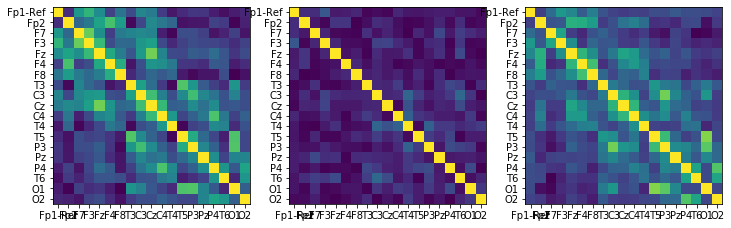

In [31]:
#Hilbert transform
f=25 #alpha rithm
fwhm = 5
filepath = os.path.join(folder_path, f_open)
rho_ispc, rho_pli, rho_pow = plot_hilbert(filepath, f, fwhm, start = 10000, end = 15000)

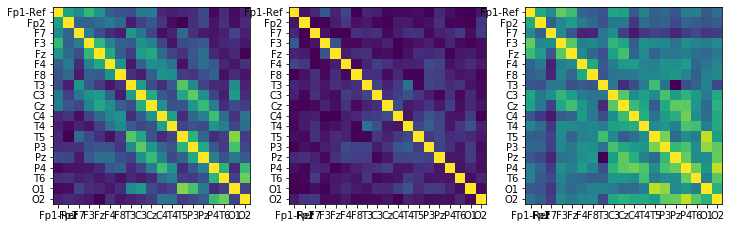

In [32]:
filepath = os.path.join(folder_path, f_close)
rho_ispc, rho_pli, rho_pow = plot_hilbert(filepath, f, fwhm, start = 10000, end = 15000)

In [33]:
def plot_wavelet(filepath, f, start = 10000, end = 15000):
    exp = RestingEEG(filepath)
    exp.load_data(plot_show=False)
    exp.data = exp.data[:, start:end]
    rho_ispc, rho_pli, rho_pow = exp.wavelet_phase_synch_all(f)
    fig, ax = plt.subplots(nrows = 1,ncols = 3,figsize=(12,6))
    im = ax[0].imshow(rho_ispc)
    im = ax[1].imshow(rho_pli)
    im = ax[2].imshow(rho_pow)
    for i in range(3):
        ax[i].set_xticks(np.arange(19))
        ax[i].set_yticks(np.arange(19))
        ax[i].set_xticklabels(list(exp.chan_dict.values()));
        ax[i].set_yticklabels(list(exp.chan_dict.values()));
    return rho_ispc, rho_pli, rho_pow 

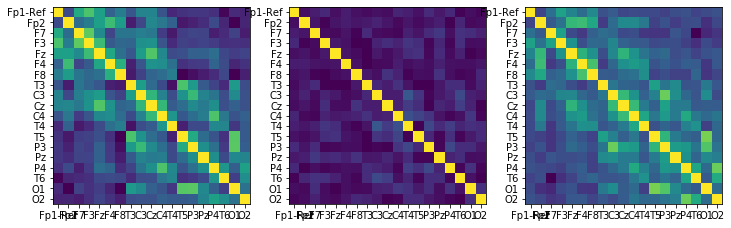

In [35]:
filepath = os.path.join(folder_path, f_open)
rho_ispc, rho_pli, rho_pow = plot_wavelet(filepath, f, start = 10000, end = 15000)

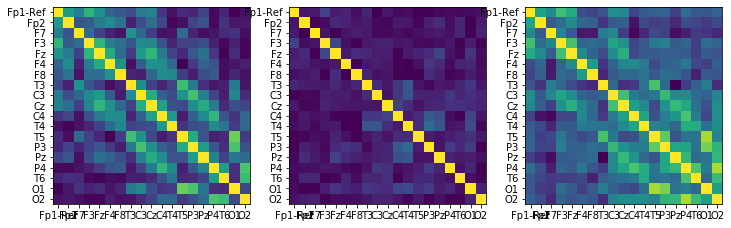

In [36]:
filepath = os.path.join(folder_path, f_close)
rho_ispc, rho_pli, rho_pow = plot_wavelet(filepath, f,start = 10000, end = 15000)